# Statistical learning final project

## dataset selection and preprocessing

### Daniel A.
### UID: 100444499

In [32]:
# Importing libraries
library(dplyr)
library(ggplot2)
library(stringr)
library(gridExtra)

In [33]:
# importing the data
df <- read.csv('./data/data.csv')

In [122]:
# function to plot
plots <- function(dataset, col, fw=FALSE, hist='default',
                  density='default' , bins='default',
                  xtick_angles='default', sep=FALSE) {
    var <- dataset %>% dplyr::select(col)
    if (bins == 'default') {bins <- rep(10,2)}
    if (xtick_angles == 'default') {xtick_angles <- rep(90,2)}
    if (hist == 'default') {hist <- c(FALSE,FALSE)}
    if (density == 'default') {density <- c(TRUE,TRUE)}

    p1 <- dataset %>% ggplot(aes(x=var[,1])) +
        geom_boxplot() +
        ggtitle(str_interp("${col}")) +
        theme(axis.title.x=element_blank(),axis.text.y=element_blank())
    p2 <- dataset %>% ggplot(aes(x=var[,1], fill=hdi_cat)) +
        geom_boxplot() +
        ggtitle(str_interp("${col} grouped by HDI")) +
        theme(axis.title.x=element_blank(),axis.text.y=element_blank())
    p3 <- dataset %>% ggplot(aes(x=var[,1])) +
        ggtitle(str_interp("${col}")) +
        theme(axis.title.x=element_blank(),
                axis.text.x = element_text(angle = xtick_angles[1]))
    p4 <- dataset %>% ggplot(aes(x=var[,1])) +
        ggtitle(str_interp("${col} by HDI group")) +
        theme(axis.title.x=element_blank(),
                axis.text.x = element_text(angle = xtick_angles[2]))
    if (hist[1] == TRUE) {
        p3 <- p3 + geom_histogram(aes(y=..density..),bins=bins[1])}
    if (hist[2] == TRUE) {
        p4 <- p4 + geom_histogram(show.legend = FALSE,bins=bins[2],
                                  aes(fill=hdi_cat,y=..density..))}
    if (density[1] == TRUE) {
        p3 <- p3 + geom_density()}
    if (density[2] == TRUE) {
        p4 <- p4 + geom_density(aes(group=hdi_cat,colour=hdi_cat,fill=hdi_cat))}
    if (fw == TRUE) {p4 <- p4 + facet_wrap(~hdi_cat, nrow = 1)}
    if (sep == TRUE) {
        grid.arrange(p1,p2, nrow=2)
        grid.arrange(p3,p4, nrow=2)}
    else {grid.arrange(p1,p2,p3,p4, nrow=4)}
}

In [107]:
# Checking colnames
cols = names(df)
cols = cols[6:(length(cols)-2)]

## GDP

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


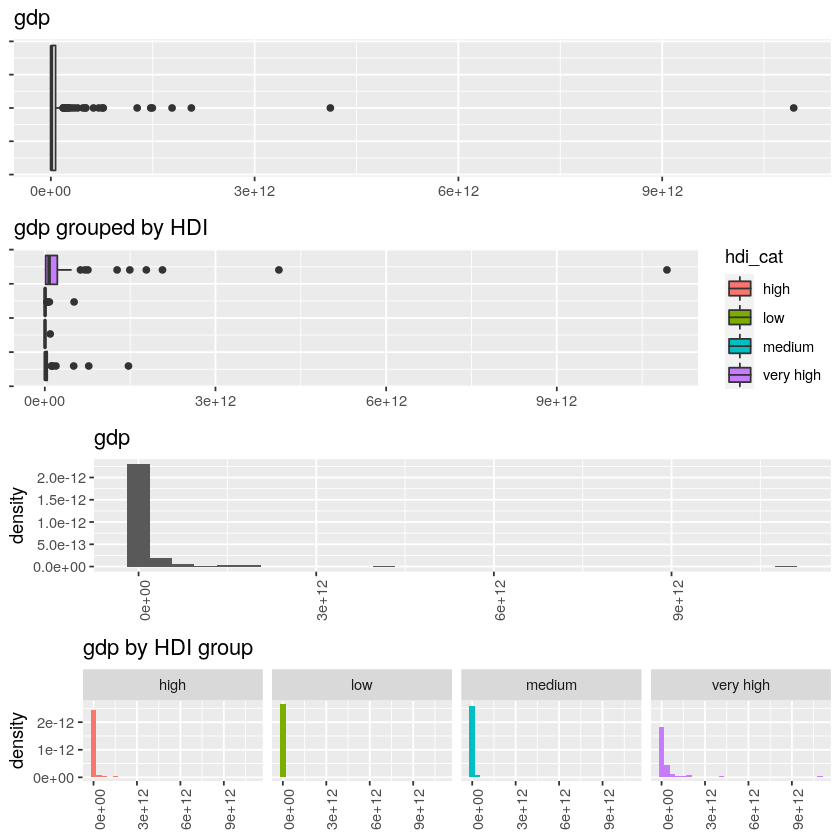

In [126]:
plots(dataset=df, col=cols[1], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

We can see there's several extreme outliers for GDP, not only in general but also per group.



In [ ]:
plots(dataset=df, col=cols[1], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), fw=TRUE)